In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [35]:
df = pd.read_csv('US_Health_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
#males = df.loc[ df['sex'] == 'male'].copy()
#females = df.loc[ df['sex'] == 'female'].copy()
#smokers = df.loc[ df['smoker'] == 'yes'].copy()
#non_smokers = df.loc[ df['smoker'] == 'no'].copy()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [38]:
num_col = ['age', 'bmi', 'charges']
cat_col = ['sex', 'children', 'smoker','region']

<AxesSubplot:>

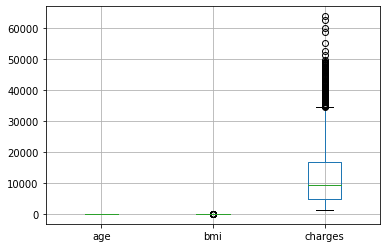

In [39]:
df.boxplot(num_col)

In [40]:
for x in ['charges']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [41]:
df.isnull().sum()

age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges     139
dtype: int64

In [42]:
df = df.dropna(axis=0)

In [43]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

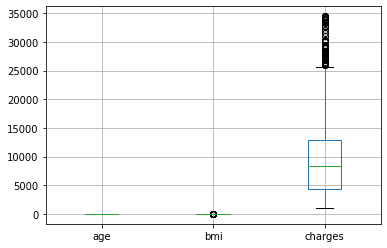

In [44]:
df.boxplot(num_col)

In [45]:
## Q1
### Null Hypothesis: There is no difference in insurance charges between smokers and non-smokers
### Alt Hypothesis: We see a difference in insurance charges betweem smokers and non-smokers

In [46]:
smoker_charges = df.loc[ df['smoker']=='yes',"charges"]
nonsmoker_charges = df.loc[ df['smoker']=='no',"charges"]

print(f"For smokers (n={len(smoker_charges)}): Mean={np.mean(smoker_charges):.2f}")
print(f"For Non-smokers (n={len(nonsmoker_charges)}): Mean={np.mean(nonsmoker_charges):.2f}")

For smokers (n=138): Mean=22014.25
For Non-smokers (n=1061): Mean=8355.71


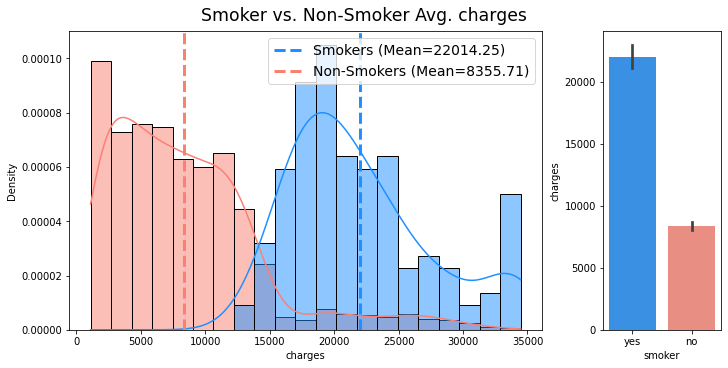

In [47]:
smoker_palette={'yes':'dodgerblue', "no":'salmon'}
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)
ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"Smokers (Mean={np.mean(smoker_charges):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(nonsmoker_charges), ls='--', lw=3, 
           label=f"Non-Smokers (Mean={np.mean(nonsmoker_charges):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')

sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Smoker vs. Non-Smoker Avg. charges',fontsize='xx-large');

In [48]:
zscores_s = stats.zscore(smoker_charges)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

0

In [49]:
zscores_n = stats.zscore(nonsmoker_charges)
outliers_n = abs(zscores_n)>3
np.sum(outliers_n)

26

In [50]:
nonsmoker_charges.value_counts()

1639.56310     2
1725.55230     1
8891.13950     1
2690.11380     1
26140.36030    1
              ..
11840.77505    1
10601.41200    1
7682.67000     1
10381.47870    1
2007.94500     1
Name: charges, Length: 1060, dtype: int64

In [51]:
result_s = stats.normaltest(smoker_charges)
result_s

NormaltestResult(statistic=12.9259309399843, pvalue=0.0015601622292913057)

In [52]:
result_n = stats.normaltest(nonsmoker_charges)
result_n

NormaltestResult(statistic=276.60999684673345, pvalue=8.608002116282395e-61)